<IPython.core.display.Javascript object>


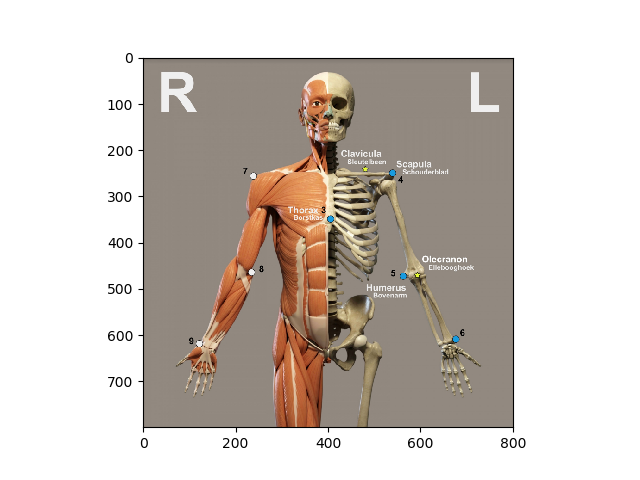

<IPython.core.display.Javascript object>


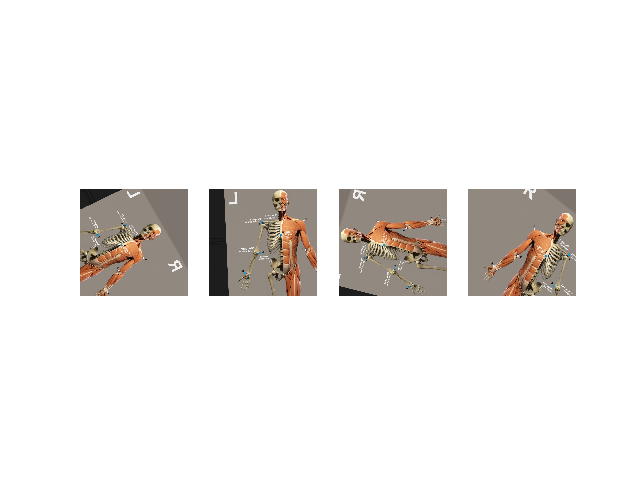

In [3]:
%matplotlib notebook
import numpy as np
from matplotlib.pyplot import imread, imshow, show, subplots
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def generate(data_generator, n=10):
    """
    Generates n image from an image by applying various transformations such as rotation, zoom, etc.
    :param data_generator: ImageDataGenerator
    :param n: Number of images to generate
    :return: Array of picture
    """
    # fit the model with the image for which we want to apply data augmentation techniques.
    data_generator.fit(images)
    # Get the image_iterator, so we can loop over it, to get data augmented images
    image_iterator = data_generator.flow(images)
    generated_images = np.array([image_iterator.next()[0]])

    n -= 1
    for image in image_iterator:
        generated_images = np.append(generated_images, [image[0]], axis=0)
        n -= 1
        if n <= 0:
            break
    return generated_images


image = imread("../img/skeleton.png")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# Display the image
imshow(images[0])
show()

# Initialize the ImageDataGenerator Object
data_generator = ImageDataGenerator(rotation_range=90,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest")

# Get the generated images
images_generated = generate(data_generator)

# Plot the first 8 images generated by the model
fig, rows = subplots(nrows=1, ncols=4)

for row_index, row in enumerate(rows):
    row.imshow(images_generated[row_index])
    row.axis('off')
show()